# NumPy, Pandas & Matplotlib Integration

In [3]:
import pandas as pd
import numpy as np
import zipfile

# Unzip the file
zip_file_path = 'C:\!Projects\DI-Bootcamp\Week6\Day2\Daily\global_power_plant_database_v_1_3.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/mnt/data/')

# Load the dataset into a Pandas DataFrame
csv_file_path = '/mnt/data/global_power_plant_database.csv'
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print("Dataset Preview:")
print(df.head())

<>:6: SyntaxWarning: invalid escape sequence '\!'
<>:6: SyntaxWarning: invalid escape sequence '\!'
C:\Users\kyana\AppData\Local\Temp\ipykernel_43940\4169879410.py:6: SyntaxWarning: invalid escape sequence '\!'
  zip_file_path = 'C:\!Projects\DI-Bootcamp\Week6\Day2\Daily\global_power_plant_database_v_1_3.zip'
C:\Users\kyana\AppData\Local\Temp\ipykernel_43940\4169879410.py:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


Dataset Preview:
  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0    

In [4]:
# Identify missing values
missing_values = df.isnull().sum()

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Re-check missing values after handling
missing_values_after = df.isnull().sum()

missing_values, missing_values_after

(country                               0
 country_long                          0
 name                                  0
 gppd_idnr                             0
 capacity_mw                           0
 latitude                              0
 longitude                             0
 primary_fuel                          0
 other_fuel1                       32992
 other_fuel2                       34660
 other_fuel3                       34844
 commissioning_year                17489
 owner                             14068
 source                               15
 url                                  18
 geolocation_source                  419
 wepp_id                           18702
 year_of_capacity_data             20049
 generation_gwh_2013               28519
 generation_gwh_2014               27710
 generation_gwh_2015               26733
 generation_gwh_2016               25792
 generation_gwh_2017               25436
 generation_gwh_2018               25299
 generation_gwh_

In [5]:
# Step 2.1: Summarize key statistics for numerical columns
numerical_summary = df.describe()

# Step 2.2: Explore the distribution of power plants by country and fuel type
country_distribution = df['country'].value_counts()
fuel_type_distribution = df['primary_fuel'].value_counts()

numerical_summary, country_distribution.head(), fuel_type_distribution.head()


(        capacity_mw      latitude     longitude  commissioning_year  \
 count  34936.000000  34936.000000  34936.000000        34936.000000   
 mean     163.355148     32.816637     -6.972803         1997.414823   
 std      489.636072     22.638603     78.405850           16.534583   
 min        1.000000    -77.847000   -179.977700         1896.000000   
 25%        4.900000     29.256475    -77.641550         1997.414823   
 50%       16.745000     39.727750     -2.127100         1997.414823   
 75%       75.344250     46.263125     49.502675         2007.000000   
 max    22500.000000     71.292000    179.388700         2020.000000   
 
        year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
 count           34936.000000         34936.000000         34936.000000   
 mean             2018.218849           592.696107           656.863891   
 std                 1.048624           932.025542          1014.795407   
 min              2000.000000          -947.600000

In [6]:
# Step 3.1: Perform a statistical analysis of power output by fuel type
fuel_type_groups = df.groupby('primary_fuel')['capacity_mw'].describe()

# Step 3.2: Hypothesis testing to determine if the mean power output differs significantly between different fuel types
from scipy.stats import f_oneway

# Extracting capacity_mw values for a few fuel types
solar_capacity = df[df['primary_fuel'] == 'Solar']['capacity_mw']
hydro_capacity = df[df['primary_fuel'] == 'Hydro']['capacity_mw']
wind_capacity = df[df['primary_fuel'] == 'Wind']['capacity_mw']

# Perform one-way ANOVA
anova_result = f_oneway(solar_capacity, hydro_capacity, wind_capacity)

fuel_type_groups, anova_result

(                  count         mean          std   min       25%         50%  \
 primary_fuel                                                                    
 Biomass          1430.0    23.972938    39.461805   1.0     2.900     9.45000   
 Coal             2330.0   843.579828   888.187187   1.2   200.000   600.00000   
 Cogeneration       41.0    98.731707   283.428252   1.6     7.500    31.90000   
 Gas              3998.0   373.449375   560.934146   1.0    28.425   147.50000   
 Geothermal        189.0    67.130952   114.640890   1.0    18.200    30.00000   
 Hydro            7156.0   147.171551   549.809328   1.0     5.395    20.00000   
 Nuclear           195.0  2091.855179  1303.509273  20.0  1146.650  1888.00000   
 Oil              2320.0   112.878754   392.009039   1.0     2.500     9.00000   
 Other              43.0    84.020000   145.891392   4.5    17.000    40.00000   
 Petcoke            12.0   202.048125   476.986459   4.7    22.375    65.48875   
 Solar          

In [7]:
# Step 4.1: Analyze trends over time for commissioning year
commissioning_year_trend = df['commissioning_year'].value_counts().sort_index()

# Step 4.2: Explore the evolution of fuel types over the years
fuel_type_yearly = df.groupby(['commissioning_year', 'primary_fuel']).size().unstack().fillna(0)

commissioning_year_trend, fuel_type_yearly.head()

(commissioning_year
 1896.000000      1
 1899.000000      1
 1900.000000      6
 1901.000000      2
 1902.000000      4
               ... 
 2019.000000    596
 2019.000000      1
 2019.411765      1
 2019.796326      1
 2020.000000    150
 Name: count, Length: 2024, dtype: int64,
 primary_fuel        Biomass  Coal  Cogeneration  Gas  Geothermal  Hydro  \
 commissioning_year                                                        
 1896.0                  0.0   0.0           0.0  0.0         0.0    1.0   
 1899.0                  0.0   0.0           0.0  0.0         0.0    1.0   
 1900.0                  0.0   0.0           0.0  1.0         0.0    3.0   
 1901.0                  0.0   0.0           0.0  0.0         0.0    2.0   
 1902.0                  0.0   0.0           0.0  0.0         0.0    4.0   
 
 primary_fuel        Nuclear  Oil  Other  Petcoke  Solar  Storage  Waste  \
 commissioning_year                                                        
 1896.0                  0.0  0.

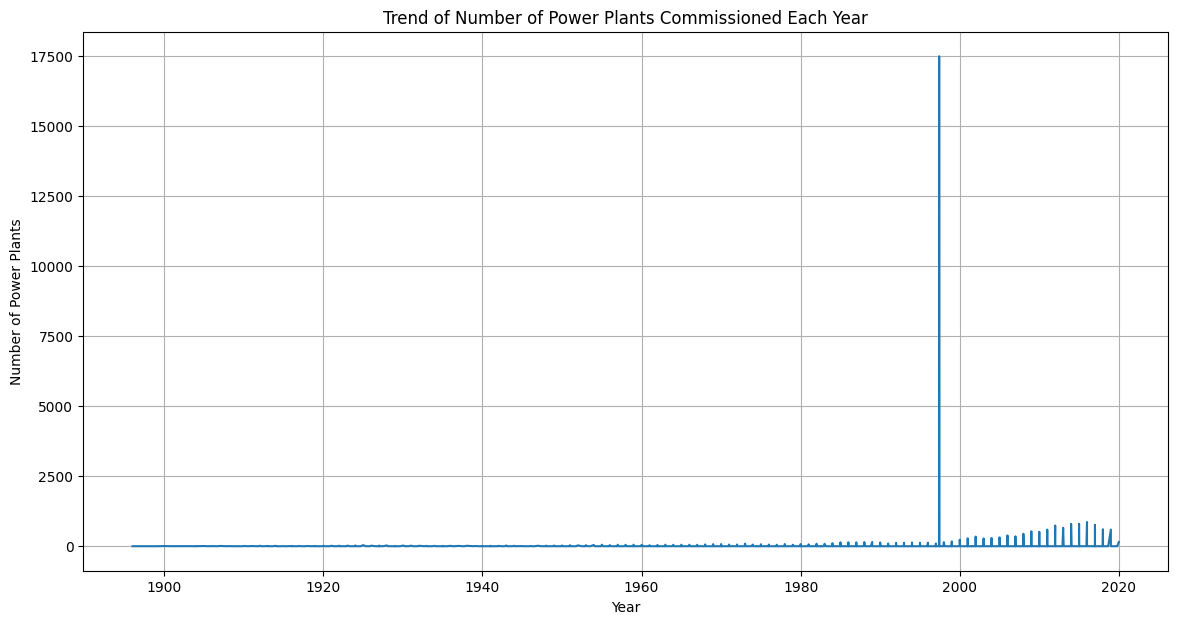

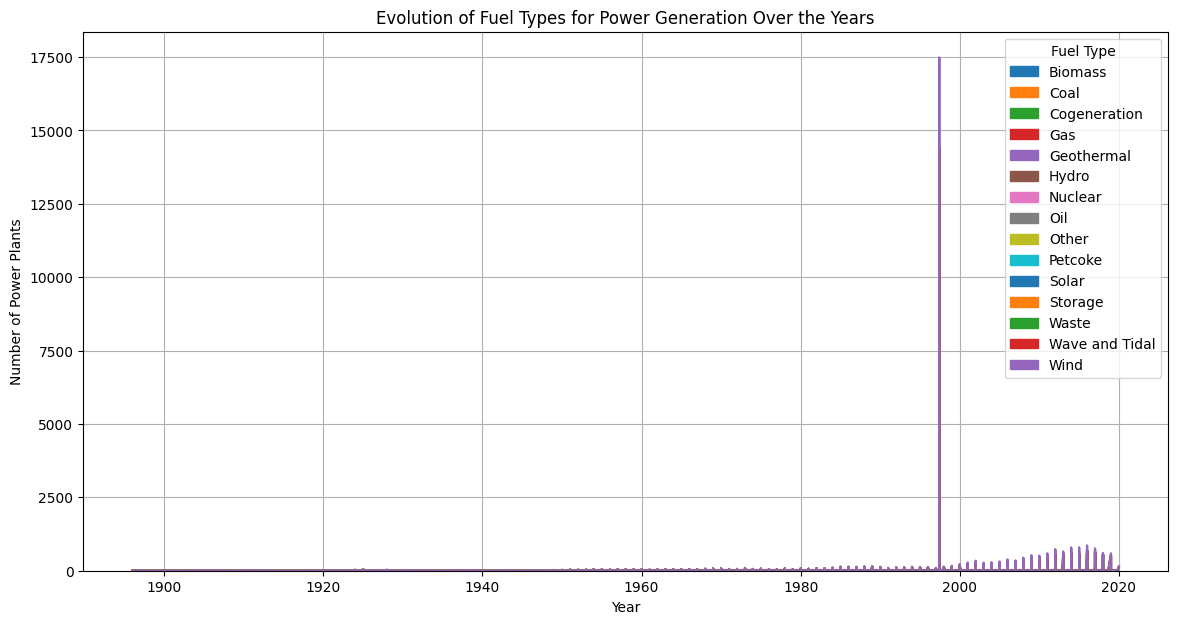

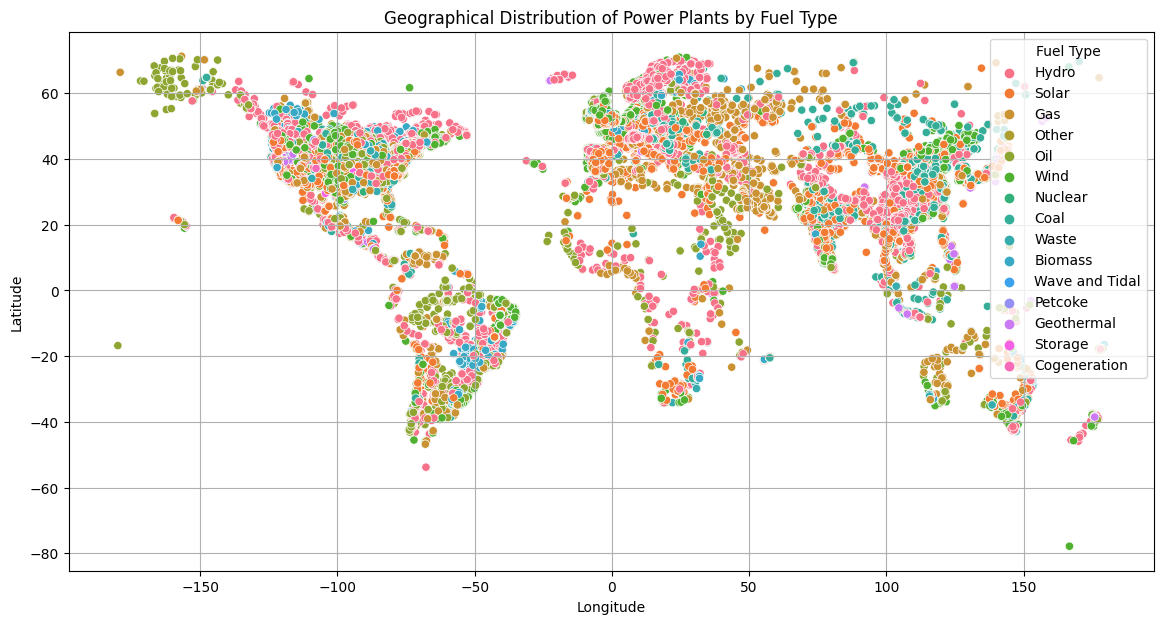

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5.1: Create visualizations using Matplotlib and Seaborn

# Plotting the trend of the number of power plants commissioned each year
plt.figure(figsize=(14, 7))
plt.plot(commissioning_year_trend.index, commissioning_year_trend.values)
plt.title('Trend of Number of Power Plants Commissioned Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.grid(True)
plt.show()

# Plotting the evolution of fuel types over the years
fuel_type_yearly.plot(kind='area', stacked=True, figsize=(14, 7))
plt.title('Evolution of Fuel Types for Power Generation Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

# Step 5.2: Plot the geographical distribution of power plants
plt.figure(figsize=(14, 7))
sns.scatterplot(x='longitude', y='latitude', hue='primary_fuel', data=df)
plt.title('Geographical Distribution of Power Plants by Fuel Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fuel Type', loc='upper right')
plt.grid(True)
plt.show()

In [9]:
# Step 6.1: Demonstrate matrix operations
# Creating a small matrix of relevant features for demonstration
features = df[['capacity_mw', 'latitude', 'longitude']]
matrix = features.to_numpy()

# Calculate the covariance matrix
cov_matrix = np.cov(matrix, rowvar=False)

# Step 6.2: Discuss eigenvectors and eigenvalues
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

cov_matrix, eigenvalues, eigenvectors

(array([[ 2.39743483e+05, -1.46512725e+02,  5.81707732e+03],
        [-1.46512725e+02,  5.12506327e+02, -1.21328995e+02],
        [ 5.81707732e+03, -1.21328995e+02,  6.14747738e+03]]),
 array([239888.34493566,   6005.22827679,    509.89320204]),
 array([[ 9.99690263e-01, -2.48871486e-02,  9.13937503e-05],
        [-6.24482185e-04, -2.14133001e-02,  9.99770514e-01],
        [ 2.48794803e-02,  9.99460905e-01,  2.14222092e-02]]))

Filtered DataFrame:
   country country_long         name   gppd_idnr  capacity_mw  latitude  \
10     ALB      Albania       Fierza  WRI1002170        500.0   42.2514   
11     ALB      Albania        Koman  WRI1002171        600.0   42.1033   
15     ALB      Albania  Vau i Dijes  WRI1002175        250.0   42.0137   
19     DZA      Algeria  Ain Djasser  WRI1023776        520.0   35.8665   
27     DZA      Algeria        Arbaa  WRI1023777        560.0   36.5988   

    longitude primary_fuel other_fuel1 other_fuel2  ...  \
10    20.0431        Hydro         Oil         Gas  ...   
11    19.8224        Hydro         Oil         Gas  ...   
15    19.6359        Hydro         Oil         Gas  ...   
19     6.0262          Gas         Oil         Gas  ...   
27     3.1375          Gas         Oil         Gas  ...   

   estimated_generation_gwh_2013  estimated_generation_gwh_2014  \
10                   1976.010000                    1276.610000   
11                   2072.130000        

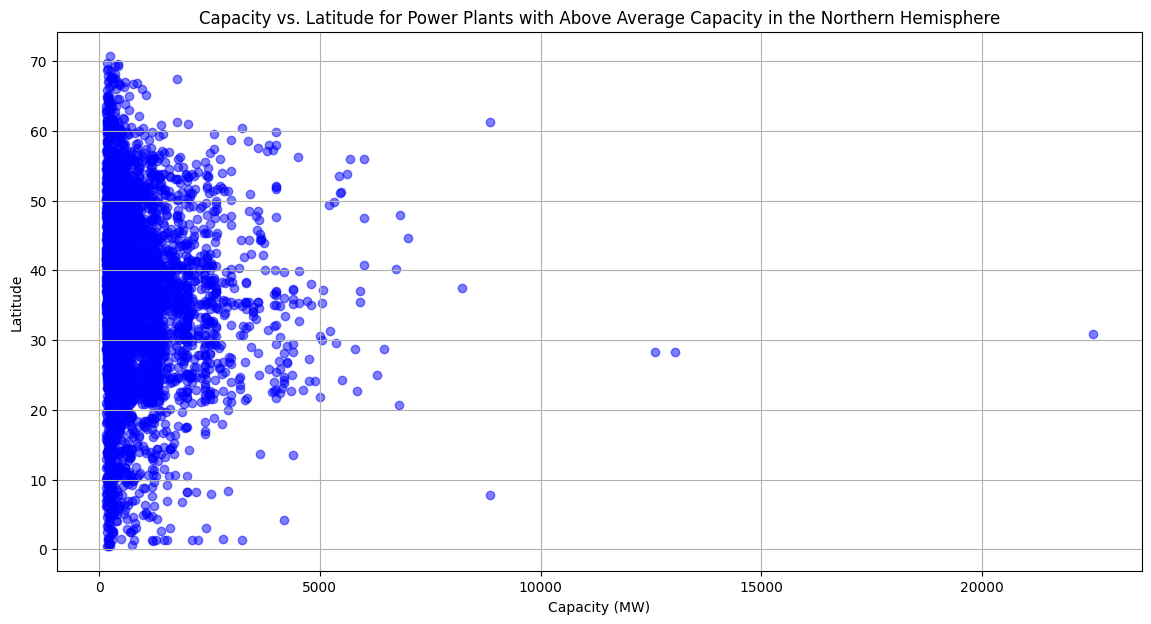

In [10]:
# Example: Using NumPy for complex filtering in Pandas
# Select power plants with capacity greater than the mean capacity and located in the northern hemisphere
mean_capacity = df['capacity_mw'].mean()
filtered_df = df[(df['capacity_mw'] > mean_capacity) & (df['latitude'] > 0)]

# Print the filtered DataFrame
print("Filtered DataFrame:")
print(filtered_df.head())

# Example: Using NumPy arrays for sophisticated plots in Matplotlib
# Plot the relationship between capacity and latitude
plt.figure(figsize=(14, 7))
plt.scatter(filtered_df['capacity_mw'], filtered_df['latitude'], c='blue', alpha=0.5)
plt.title('Capacity vs. Latitude for Power Plants with Above Average Capacity in the Northern Hemisphere')
plt.xlabel('Capacity (MW)')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()